In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!cp '/content/drive/My Drive/SmartPhone Dataset/Train.csv' '/content/'
!cp '/content/drive/My Drive/SmartPhone Dataset/Test.csv' '/content/'

Mounted at /content/drive


In [12]:
train_df=pd.read_csv("Train.csv")
test_df=pd.read_csv("Test.csv")
train_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
test_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
train_df.head() 
test_df.head()

,acc_max,gyro_max,acc_kurtosis,gyro_kurtosis,label,lin_max,acc_skewness,gyro_skewness,post_gyro_max,post_lin_max,fall
0,28.055199,10.794617,21.334536,34.163811,FOL,13.880578,3.283404,4.577283,10.755339,13.762561,1
1,26.639681,8.785024,13.518671,12.812894,FOL,15.789372,3.301849,3.464729,8.277714,15.341656,1
2,25.045219,5.307413,21.603060,4.754182,FOL,11.592445,3.124714,2.268676,4.976134,11.303823,1
3,24.102184,8.929061,24.647657,18.595684,FOL,10.107835,4.522305,3.955288,8.719755,9.727437,1
4,31.668808,10.714750,18.008912,15.086251,FOL,14.138265,3.142132,3.530621,10.580791,13.935016,1


## Feature Selection

In [13]:
X_train = train_df.drop(['fall','label'],axis=1)
y_train = train_df['fall']
X_test =  test_df.drop(['fall','label'],axis=1)
y_test =  test_df['fall']

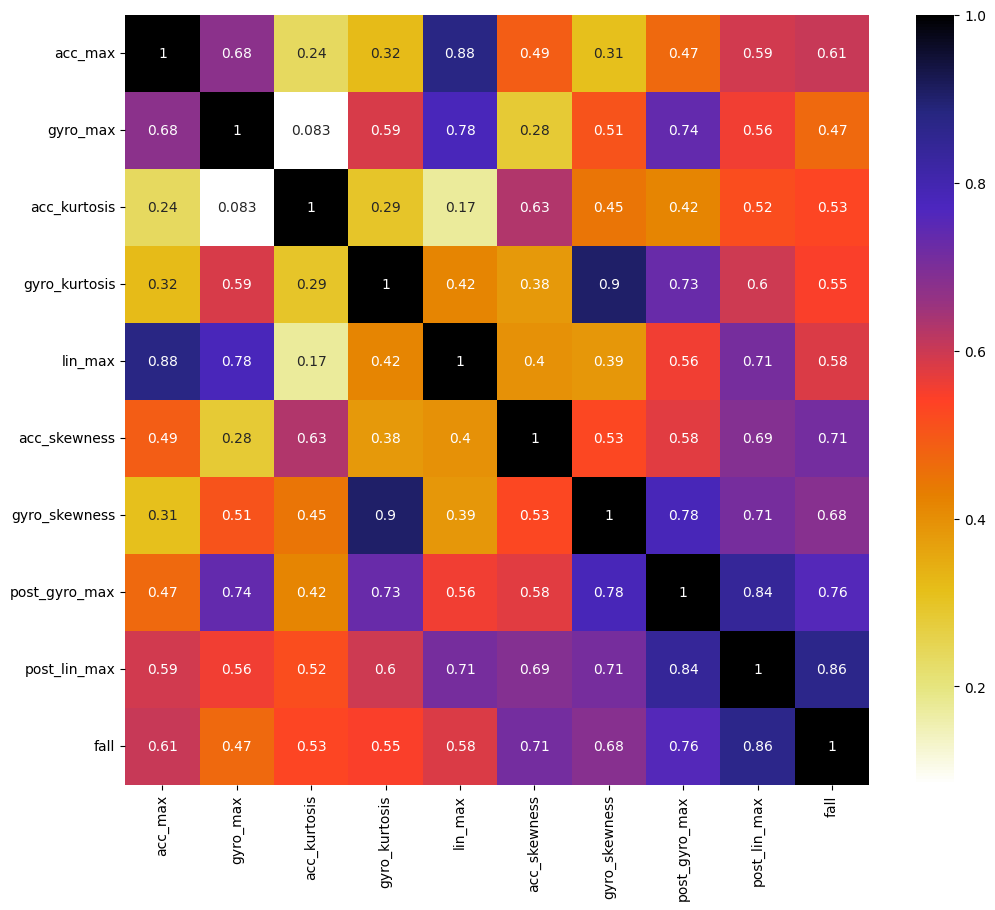

In [ ]:
%matplotlib inline
df_cleaned=train_df.drop(['label'],axis=1)
cor = df_cleaned.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
               colname = corr_matrix.columns[i]
               col_corr.add(colname)
    return col_corr 
corr_features = correlation(X_train, 0.85)                  
print(corr_features)

{'gyro_skewness', 'lin_max'}


In [ ]:
from sklearn.feature_selection import mutual_info_regression
def calculate_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y, discrete_features=False)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = calculate_mi_scores(X_train, y_train)

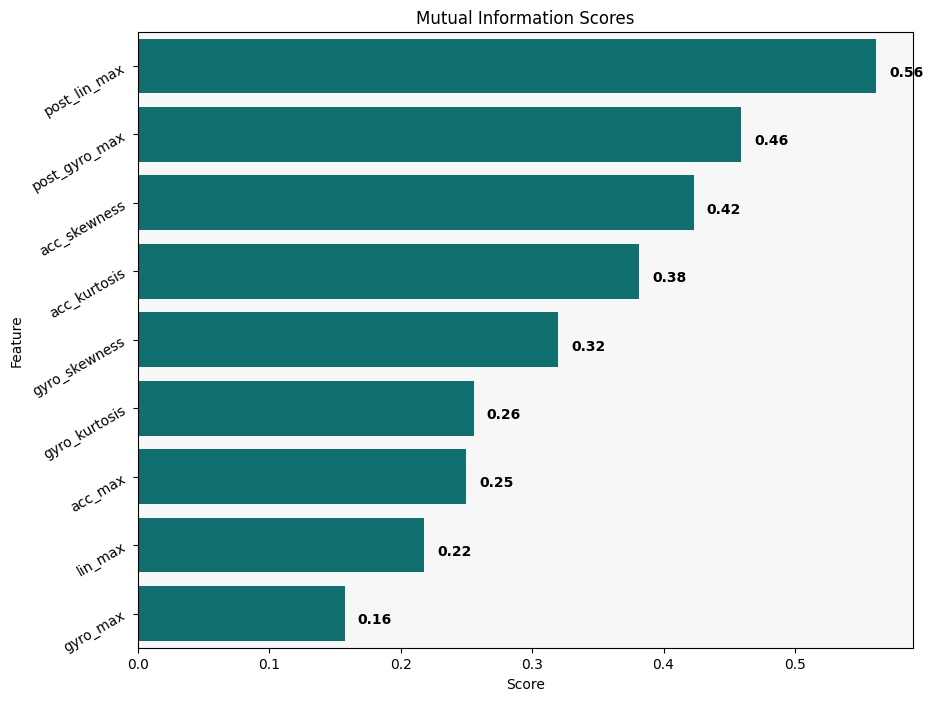

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=mi_scores.values, y=mi_scores.index, ax=ax, color='teal')

# set the title and axis labels
ax.set_title("Mutual Information Scores")
ax.set_xlabel("Score")
ax.set_ylabel("Feature")

# set the background color and style
sns.set_style("darkgrid")
ax.set_facecolor("#F7F7F7")

# rotate the y-axis labels for better visibility
plt.setp(ax.get_yticklabels(), rotation=30, ha="right")

# add value labels to the bars
for i, v in enumerate(mi_scores.values):
    ax.text(v + 0.01, i + .15, str(round(v, 2)), color='black', fontweight='bold')

# show the plot
plt.show()

In [14]:
X_train.drop(['gyro_max'], axis=1, inplace=True)
X_test.drop(['gyro_max'], axis=1, inplace=True)
X_train.drop(['gyro_skewness'], axis=1, inplace=True)
X_test.drop(['gyro_skewness'], axis=1, inplace=True)
X_train.drop(['lin_max'], axis=1, inplace=True)
X_test.drop(['lin_max'], axis=1, inplace=True)

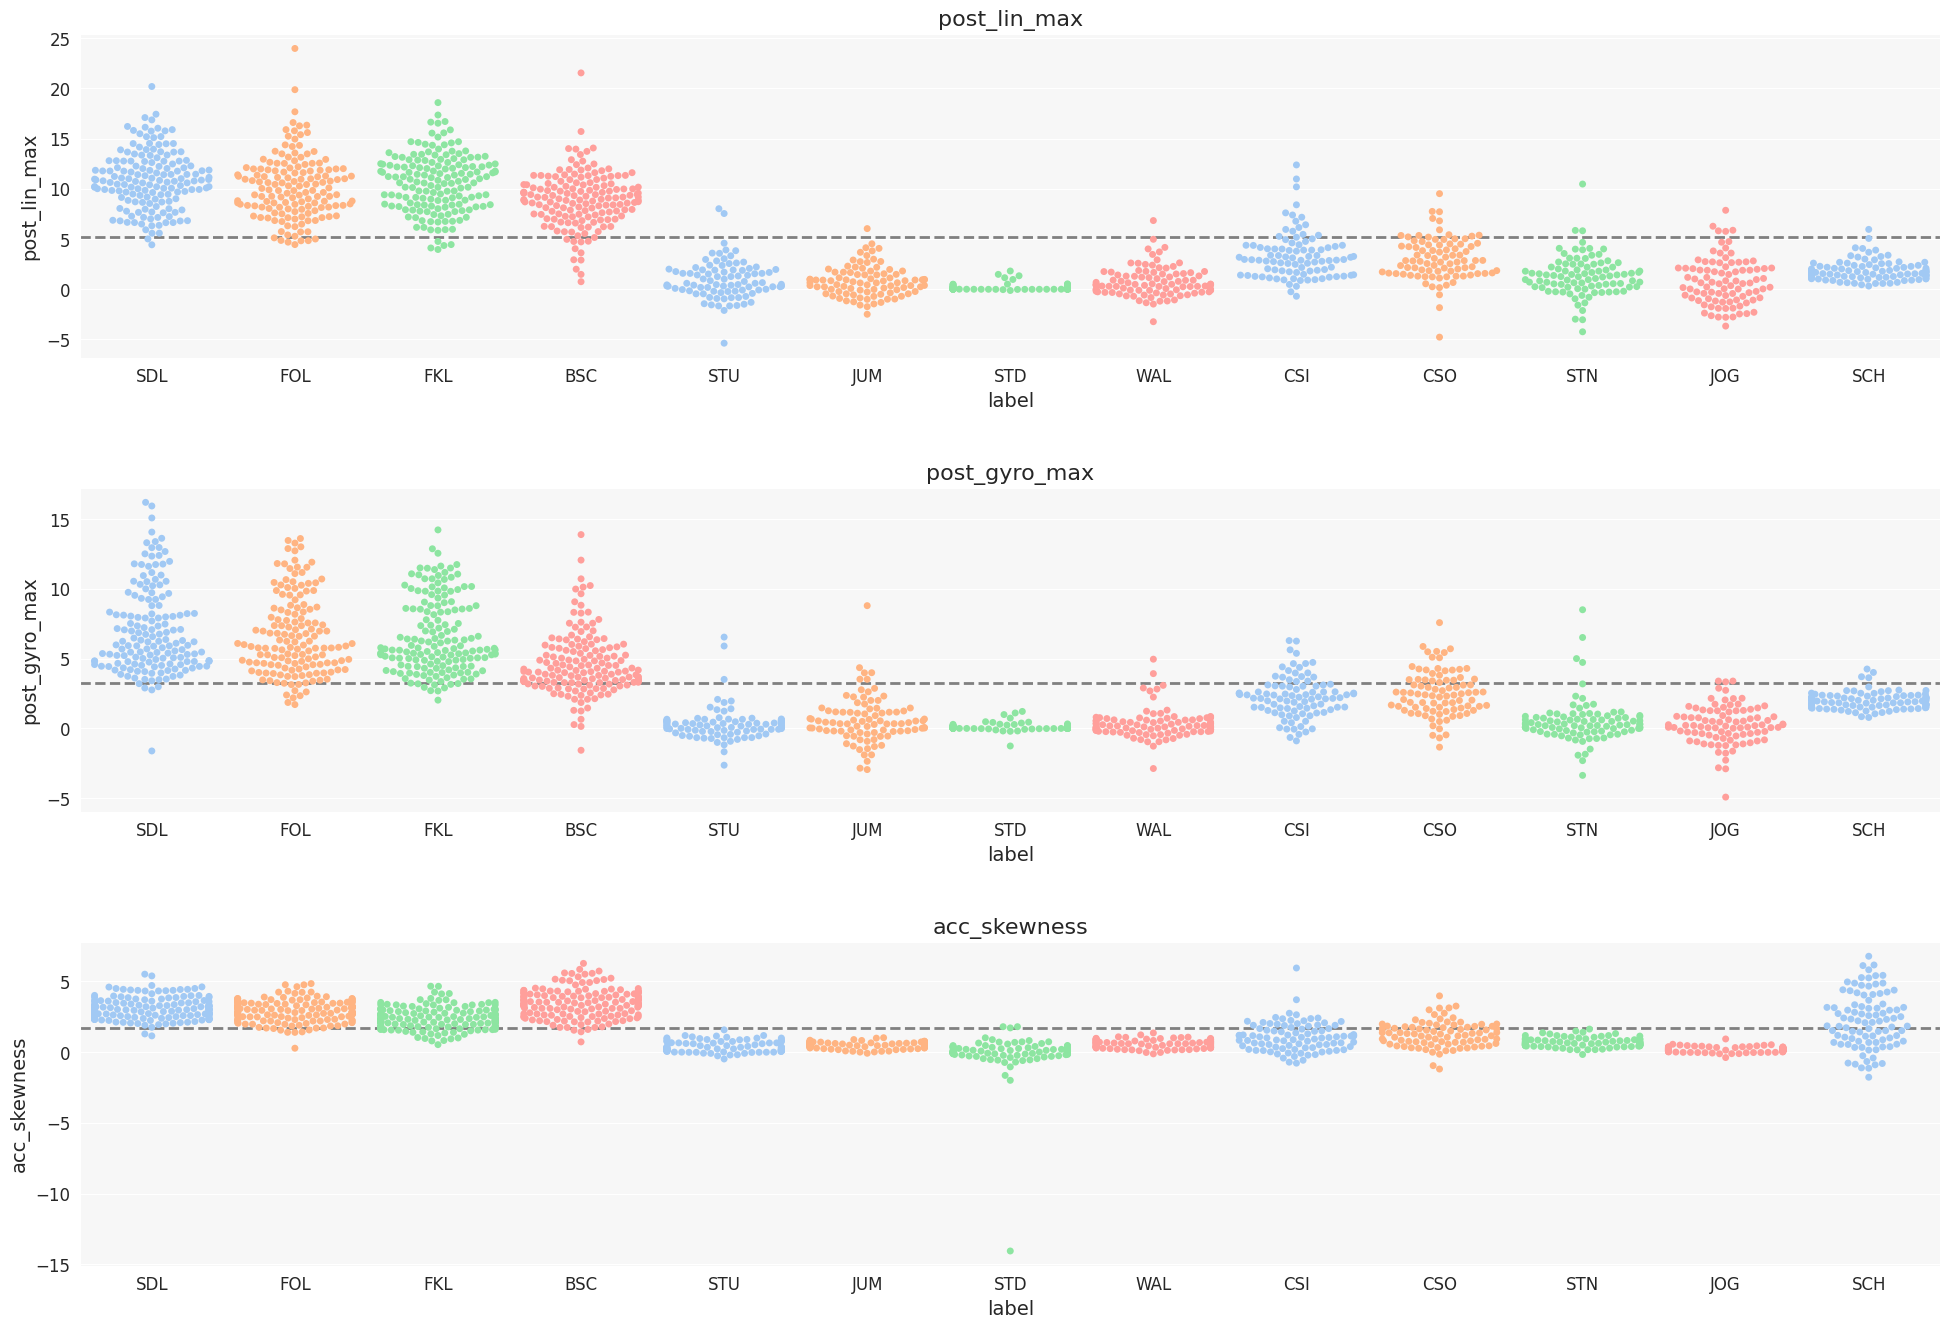

In [ ]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    warnings.filterwarnings("ignore", category=UserWarning)
# create a custom color palette
    # colors = ["#4C72B0", "#DD8452"]
    colors = sns.color_palette("pastel", n_colors=4)

    # create a figure with two subplots
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(24, 16))

    # create a swarmplot for post_lin_max in the first subplot
    sns.swarmplot(x=train_df.label, y=train_df.post_lin_max, ax=ax[0], palette=colors)

    # create a swarmplot for post_gyro_max in the second subplot
    sns.swarmplot(x=train_df.label, y=train_df.post_gyro_max, ax=ax[1], palette=colors)

    sns.swarmplot(x=train_df.label, y=train_df.acc_skewness, ax=ax[2], palette=colors)

    # set the titles and axis labels for the subplots
    ax[0].set_title("post_lin_max", fontsize=16)
    ax[0].set_xlabel("label", fontsize=14)
    ax[0].set_ylabel("post_lin_max", fontsize=14)

    ax[1].set_title("post_gyro_max", fontsize=16)
    ax[1].set_xlabel("label", fontsize=14)
    ax[1].set_ylabel("post_gyro_max", fontsize=14)


    ax[2].set_title("acc_skewness", fontsize=16)
    ax[2].set_xlabel("label", fontsize=14)
    ax[2].set_ylabel("acc_skewness", fontsize=14)

    # set the tick label font size
    ax[0].tick_params(labelsize=12)
    ax[1].tick_params(labelsize=12)
    ax[2].tick_params(labelsize=12)

    # set the background color and style for the subplots
    sns.set_style("whitegrid")
    ax[0].set_facecolor("#F7F7F7")
    ax[1].set_facecolor("#F7F7F7")
    ax[2].set_facecolor("#F7F7F7")

    # add a horizontal line for the mean of each variable
    ax[0].axhline(y=train_df.post_lin_max.mean(), color='gray', linestyle='dashed', linewidth=2)
    ax[1].axhline(y=train_df.post_gyro_max.mean(), color='gray', linestyle='dashed', linewidth=2)
    ax[2].axhline(y=train_df.acc_skewness.mean(), color='gray', linestyle='dashed', linewidth=2)

    fig.subplots_adjust(hspace=0.4)


    # show the plot
    plt.show()


In [ ]:

# calculate the outlier thresholds for each feature
q1, q3 = np.percentile(train_df.acc_skewness, [25, 75])
iqr = q3 - q1
upper_outlier_threshold_acc = q3 + 1.5 * iqr
lower_outlier_threshold_acc = q1 - 1.5 * iqr

q1, q3 = np.percentile(train_df.post_gyro_max, [25, 75])
iqr = q3 - q1
upper_outlier_threshold_gyro = q3 + 1.5 * iqr
lower_outlier_threshold_gyro = q1 - 1.5 * iqr

q1, q3 = np.percentile(train_df.post_lin_max, [25, 75])
iqr = q3 - q1
upper_outlier_threshold_lin = q3 + 1.5 * iqr
lower_outlier_threshold_lin = q1 - 1.5 * iqr

# remove outliers for each feature
train_df_cleaned = train_df[(train_df.acc_skewness <= upper_outlier_threshold_acc) & (train_df.acc_skewness >= lower_outlier_threshold_acc) & (train_df.post_gyro_max <= upper_outlier_threshold_gyro) & (train_df.post_gyro_max >= lower_outlier_threshold_gyro) & (train_df.post_lin_max <= upper_outlier_threshold_lin) & (train_df.post_lin_max >= lower_outlier_threshold_lin)]


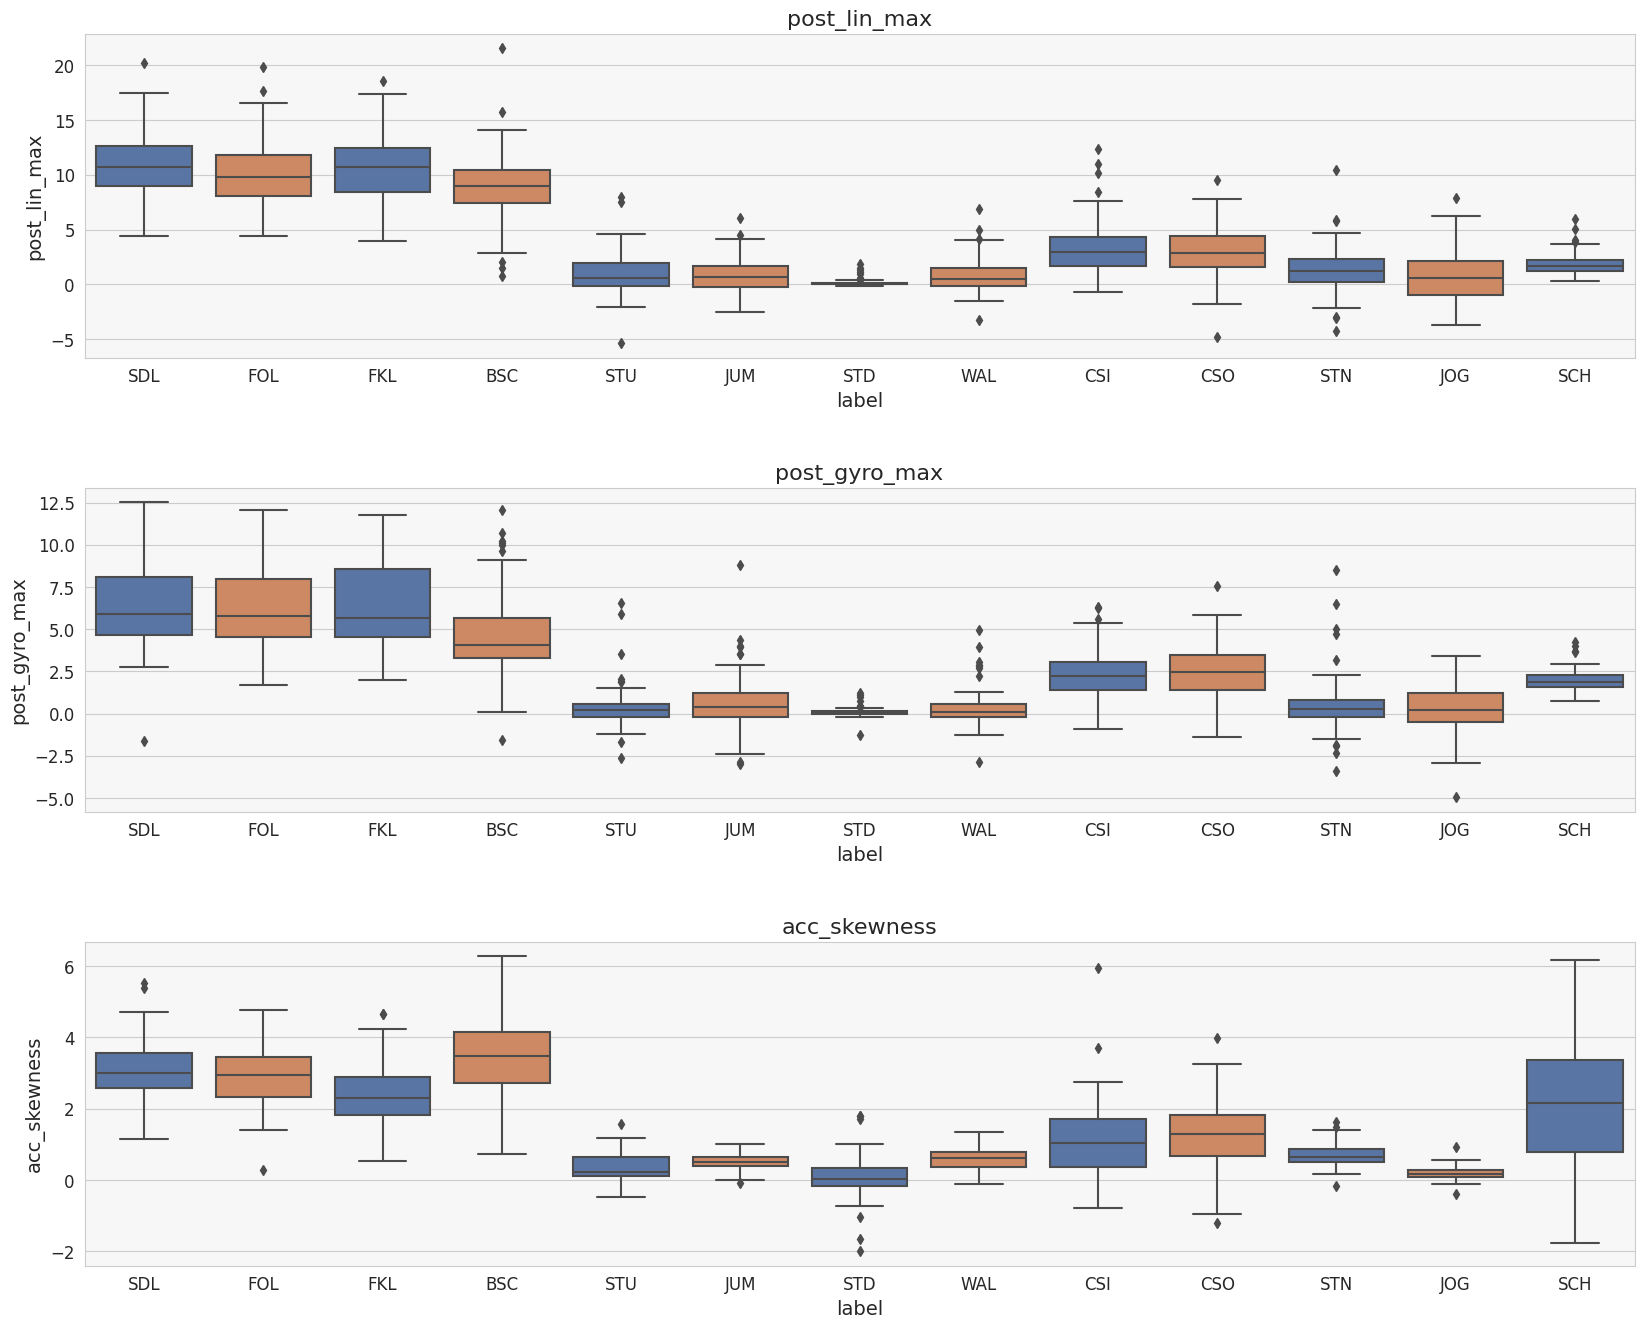

In [ ]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    warnings.filterwarnings("ignore", category=UserWarning)
# create a custom color palette
    colors = ["#4C72B0", "#DD8452"]

    # create a figure with two subplots
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 16))

    sns.boxplot(x=train_df_cleaned.label, y=train_df.post_lin_max, ax=ax[0], palette=colors)
    sns.boxplot(x=train_df_cleaned.label, y=train_df_cleaned.post_gyro_max, ax=ax[1], palette=colors)
    sns.boxplot(x=train_df_cleaned.label, y=train_df_cleaned.acc_skewness, ax=ax[2], palette=colors)

    # set the titles and axis labels for the subplots
    ax[0].set_title("post_lin_max", fontsize=16)
    ax[0].set_xlabel("label", fontsize=14)
    ax[0].set_ylabel("post_lin_max", fontsize=14)

    ax[1].set_title("post_gyro_max", fontsize=16)
    ax[1].set_xlabel("label", fontsize=14)
    ax[1].set_ylabel("post_gyro_max", fontsize=14)


    ax[2].set_title("acc_skewness", fontsize=16)
    ax[2].set_xlabel("label", fontsize=14)
    ax[2].set_ylabel("acc_skewness", fontsize=14)

    # set the tick label font size
    ax[0].tick_params(labelsize=12)
    ax[1].tick_params(labelsize=12)
    ax[2].tick_params(labelsize=12)

    # set the background color and style for the subplots
    sns.set_style("whitegrid")
    ax[0].set_facecolor("#F7F7F7")
    ax[1].set_facecolor("#F7F7F7")
    ax[2].set_facecolor("#F7F7F7")

    fig.subplots_adjust(hspace=0.4)

    # show the plot
    plt.show()


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', None],
    'bootstrap': [True, False]
}

# Create a random forest classifier
rfc = RandomForestClassifier()

# Create a grid search object with cross-validation
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5, # 5-fold cross-validation
    n_jobs=-1, # Use all available CPU cores
    verbose=2
)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print('Best hyperparameters:', grid_search.best_params_)


Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best hyperparameters: {'bootstrap': False, 'class_weight': None, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [17]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = (((predictions==test_labels).sum())/test_labels.shape[0])*100
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
best_estimator = grid_search.best_estimator_
optimal_accuracy = evaluate(best_estimator, X_test, y_test)

Model Performance
Accuracy = 97.19%.


In [33]:
params = grid_search.best_params_

min_split = [10,11,12,13,14,15]
max_depth = [10,11,12,13,14,15]

x = []
y = []
acc = []
highest_accuracy = 0
split_best=0
max_depth_best=0

for split in min_split:
    params['min_samples_split'] = split
    for depth in max_depth:
        params['max_depth'] = depth
        model = RandomForestClassifier(**params)
        model.fit(X_train, y_train)
        print("min_samples_split,max_depth",split,depth)
        accuracy = evaluate(model, X_test, y_test)
        acc.append(accuracy)
        x.append(split)
        y.append(depth)
        if (accuracy>highest_accuracy):
          split_best=split
          max_depth_best=depth
        highest_accuracy = max(highest_accuracy,accuracy)

print("The best accuracy by model is", highest_accuracy)
print(split_best,max_depth_best)

min_samples_split,max_depth 10 10
Model Performance
Accuracy = 97.47%.
min_samples_split,max_depth 10 11
Model Performance
Accuracy = 97.19%.
min_samples_split,max_depth 10 12
Model Performance
Accuracy = 97.75%.
min_samples_split,max_depth 10 13
Model Performance
Accuracy = 97.75%.
min_samples_split,max_depth 10 14
Model Performance
Accuracy = 97.47%.
min_samples_split,max_depth 10 15
Model Performance
Accuracy = 97.47%.
min_samples_split,max_depth 11 10
Model Performance
Accuracy = 97.47%.
min_samples_split,max_depth 11 11
Model Performance
Accuracy = 97.47%.
min_samples_split,max_depth 11 12
Model Performance
Accuracy = 97.47%.
min_samples_split,max_depth 11 13
Model Performance
Accuracy = 96.91%.
min_samples_split,max_depth 11 14
Model Performance
Accuracy = 97.47%.
min_samples_split,max_depth 11 15
Model Performance
Accuracy = 97.47%.
min_samples_split,max_depth 12 10
Model Performance
Accuracy = 97.47%.
min_samples_split,max_depth 12 11
Model Performance
Accuracy = 97.19%.
min_sa

In [34]:
params['min_samples_split'] =max_depth_best
params['max_depth'] = max_depth_best
print(params)

{'bootstrap': False, 'class_weight': None, 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 50}


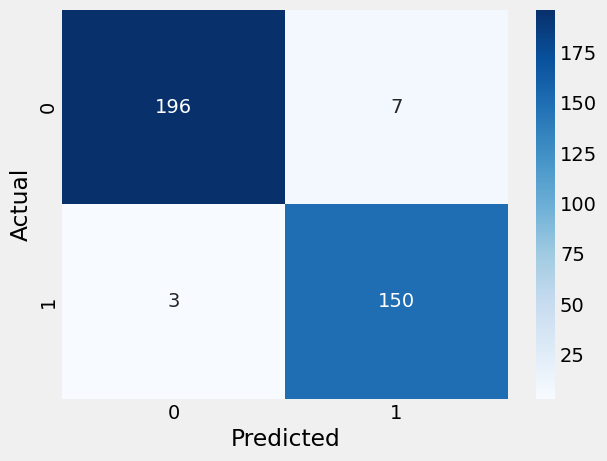

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
model = RandomForestClassifier(**params)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [3]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
train_df=pd.read_csv("Train.csv")
test_df=pd.read_csv("Test.csv")
train_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
test_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
X_train = train_df.drop(['fall','label'],axis=1)
y_train = train_df['fall']
X_test =  test_df.drop(['fall','label'],axis=1)
y_test =  test_df['fall']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)
scaler = StandardScaler()
scaler.fit(X_val)
X_val = scaler.transform(X_val)

In [5]:
# Define the neural network model
def create_model(hidden_layers, dropout_rate):
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(dropout_rate))
    for layer_size in hidden_layers[1:]:
        model.add(Dense(layer_size, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(lr=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', 'AUC', keras.metrics.Precision(), keras.metrics.Recall()])
    return model

# Set hyperparameters
learning_rate = 0.001
epochs = 50
batch_size = 32

# Define hyperparameter grid for grid search
param_grid = {
    'hidden_layers': [[128, 64, 32], [256, 128, 64], [512, 256, 128]],
    'dropout_rate': [0.3, 0.5, 0.7]
}

# Create and train model with optimized hyperparameters
model = GridSearchCV(
    estimator=KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0),
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
model.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=2)

# Get the best model and its hyperparameters
best_model = model.best_estimator_.model
best_params = model.best_params_
print(best_params)



Fitting 5 folds for each of 9 candidates, totalling 45 fits


<ipython-input-5-71df7a6696ac>:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator=KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0),


Epoch 1/50


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


36/36 - 2s - loss: 0.3711 - accuracy: 0.8634 - auc: 0.9379 - precision: 0.8490 - recall: 0.8353 - val_loss: 0.0990 - val_accuracy: 0.9685 - val_auc: 0.9925 - val_precision: 0.9573 - val_recall: 0.9655 - 2s/epoch - 57ms/step
Epoch 2/50
36/36 - 0s - loss: 0.0986 - accuracy: 0.9641 - auc: 0.9939 - precision: 0.9616 - recall: 0.9558 - val_loss: 0.0812 - val_accuracy: 0.9790 - val_auc: 0.9935 - val_precision: 0.9661 - val_recall: 0.9828 - 209ms/epoch - 6ms/step
Epoch 3/50
36/36 - 0s - loss: 0.0995 - accuracy: 0.9685 - auc: 0.9928 - precision: 0.9676 - recall: 0.9598 - val_loss: 0.0559 - val_accuracy: 0.9790 - val_auc: 0.9979 - val_precision: 0.9661 - val_recall: 0.9828 - 224ms/epoch - 6ms/step
Epoch 4/50
36/36 - 0s - loss: 0.0791 - accuracy: 0.9711 - auc: 0.9946 - precision: 0.9716 - recall: 0.9618 - val_loss: 0.0546 - val_accuracy: 0.9790 - val_auc: 0.9980 - val_precision: 0.9661 - val_recall: 0.9828 - 180ms/epoch - 5ms/step
Epoch 5/50
36/36 - 0s - loss: 0.0818 - accuracy: 0.9755 - auc: 0.

In [6]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6

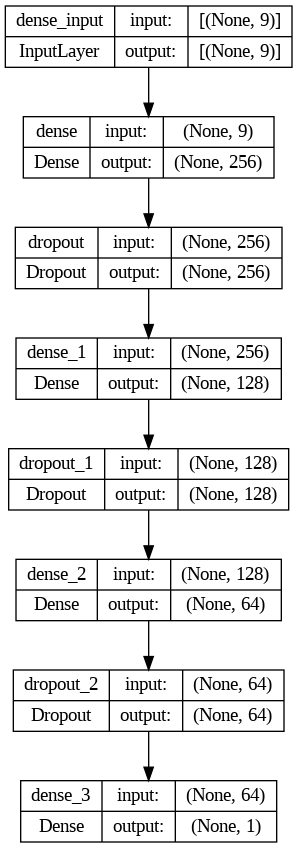

In [7]:
plot_model(best_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [8]:
# Train the best model on the full training set
history = best_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2, validation_data=(X_val, y_val))
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
print(classification_report(y_test, y_pred))

Epoch 1/50
36/36 - 2s - loss: 0.0375 - accuracy: 0.9886 - auc: 0.9990 - precision: 0.9840 - recall: 0.9900 - val_loss: 0.0308 - val_accuracy: 0.9860 - val_auc: 0.9995 - val_precision: 0.9912 - val_recall: 0.9741 - 2s/epoch - 60ms/step
Epoch 2/50
36/36 - 0s - loss: 0.0377 - accuracy: 0.9886 - auc: 0.9988 - precision: 0.9783 - recall: 0.9960 - val_loss: 0.0310 - val_accuracy: 0.9860 - val_auc: 0.9995 - val_precision: 0.9912 - val_recall: 0.9741 - 236ms/epoch - 7ms/step
Epoch 3/50
36/36 - 0s - loss: 0.0328 - accuracy: 0.9904 - auc: 0.9992 - precision: 0.9841 - recall: 0.9940 - val_loss: 0.0305 - val_accuracy: 0.9860 - val_auc: 0.9995 - val_precision: 0.9912 - val_recall: 0.9741 - 268ms/epoch - 7ms/step
Epoch 4/50
36/36 - 0s - loss: 0.0340 - accuracy: 0.9886 - auc: 0.9990 - precision: 0.9840 - recall: 0.9900 - val_loss: 0.0296 - val_accuracy: 0.9860 - val_auc: 0.9995 - val_precision: 0.9912 - val_recall: 0.9741 - 264ms/epoch - 7ms/step
Epoch 5/50
36/36 - 0s - loss: 0.0379 - accuracy: 0.986

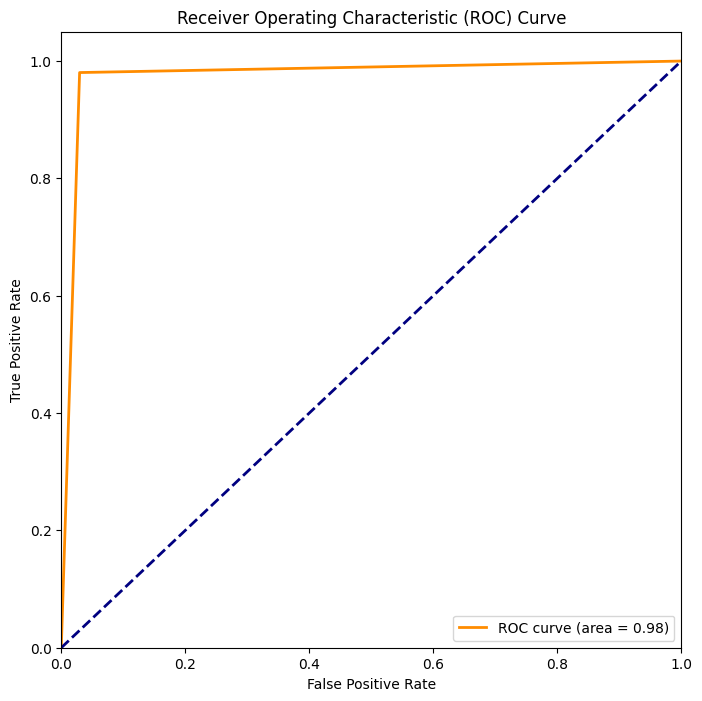

In [9]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


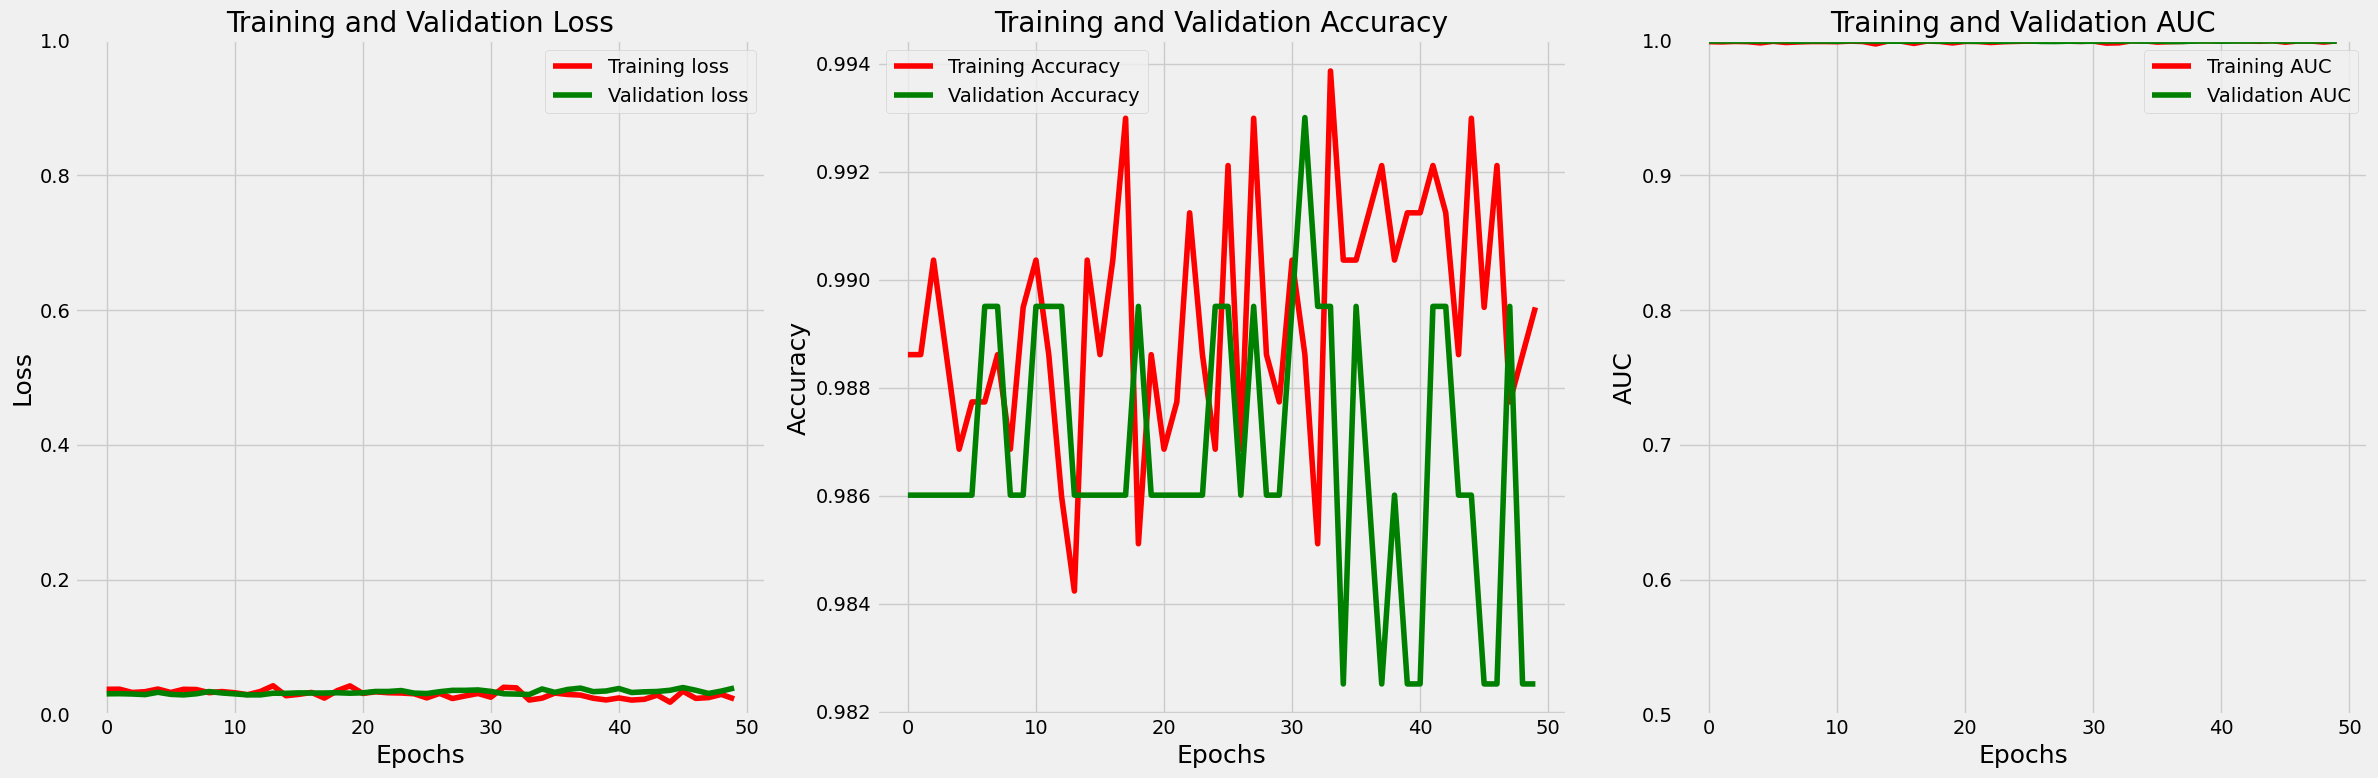

In [10]:
def plot_auc_acc_loss(history, epochs):
    tacc = history.history['accuracy']
    tloss = history.history['loss']
    tauc = history.history['auc']

    vacc = history.history['val_accuracy']
    vloss = history.history['val_loss']
    vauc = history.history['val_auc']

    Epochs = [i for i in range(epochs)]

    plt.style.use('fivethirtyeight')
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))
    axes[0].plot(Epochs, tloss, 'r', label='Training loss')
    axes[0].plot(Epochs, vloss, 'g', label='Validation loss')
    axes[0].set_ylim(0, 1)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs', fontsize=18)
    axes[0].set_ylabel('Loss', fontsize=18)
    axes[0].legend()

    axes[1].plot(Epochs, tacc, 'r', label='Training Accuracy')
    axes[1].plot(Epochs, vacc, 'g', label='Validation Accuracy')
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs', fontsize=18)
    axes[1].set_ylabel('Accuracy', fontsize=18)
    axes[1].legend()

    axes[2].plot(Epochs, tauc, 'r', label='Training AUC')
    axes[2].plot(Epochs, vauc, 'g', label='Validation AUC')
    axes[2].set_ylim(0.5, 1)
    axes[2].set_title('Training and Validation AUC')
    axes[2].set_xlabel('Epochs', fontsize=18)
    axes[2].set_ylabel('AUC', fontsize=18)
    axes[2].legend()

    plt.tight_layout()
    plt.show()

    return Epochs


Epochs = plot_auc_acc_loss(history, epochs=50)

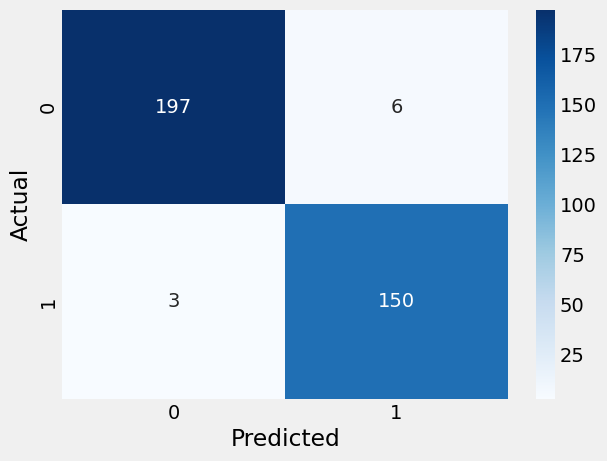

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# get true labels and predicted labels

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
